### https://cloud.tencent.com/developer/article/1922442

In [2]:
setwd('/import/DB/zhang//data')
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
sce = readRDS('OBcell.final.rds')

In [4]:
library(clusterProfiler)
library(org.Hs.eg.db)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

In [5]:
DefaultAssay(sce) ='RNA'

In [6]:
table(sce$cellgroup)


 Inter_OB normal_OB  tumor_OB 
     1111       407      1391 

In [7]:
Idents(sce) = 'cellgroup'

In [8]:
sce = subset(sce,idents = c('tumor_OB','normal_OB'))

In [9]:
DefaultAssay(sce) = 'RNA'

In [10]:
Idents(sce)='cellgroup'
deg=FindMarkers(object = sce, ident.1 = 'tumor_OB',ident.2 = 'normal_OB',
 min.pct = 0.01, logfc.threshold = 0.01,
 thresh.use = 0.99)
head(deg)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEPT7,4.520312e-250,-2.495348,0.000,0.698,9.116565e-246
MINOS1,5.965800e-227,-2.359430,0.000,0.641,1.203183e-222
IGKC,7.182485e-227,-2.584888,0.004,0.654,1.448564e-222
CTGF,5.600188e-224,-2.422128,0.000,0.634,1.129446e-219
C8orf59,8.647100e-195,-2.213547,0.000,0.560,1.743947e-190
SNHG29,2.403833e-193,2.337643,0.957,0.000,4.848051e-189


In [11]:
padj = 0.05
foldChange = 0.25

In [12]:
head(deg,2)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEPT7,4.520312e-250,-2.495348,0,0.698,9.116565e-246
MINOS1,5.965800e-227,-2.359430,0,0.641,1.203183e-222


In [13]:
deg$group = as.factor(ifelse(deg$p_val_adj < padj & abs(deg$avg_log2FC) >= foldChange, 
                                 ifelse(deg$avg_log2FC> foldChange ,'Up','Down'),'NoSignifi'))
table(deg$group)



     Down NoSignifi        Up 
      867     11719      3114 

In [14]:
res = deg

In [15]:
library(dplyr)


Attaching package: 'dplyr'


The following object is masked from 'package:AnnotationDbi':

    select


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following object is masked from 'package:Biobase':

    combine


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [16]:
top_5 <- bind_rows(   
      res %>%
        filter(group == 'Up') %>%
        arrange(p_val_adj, desc(avg_log2FC)) %>%
        head(10),
      res %>%
        filter(group == 'Down') %>%
        arrange(p_val_adj, desc(avg_log2FC)) %>%
        head(10)
    )

In [17]:
library(ggpubr)
library(ggplot2)
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)

Warning message:
"package 'ggpubr' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'ggrepel' was built under R version 4.2.3"
Warning message:
"package 'cowplot' was built under R version 4.2.3"

Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend




In [18]:
options(repr.plot.height = 6,repr.plot.width = 6)

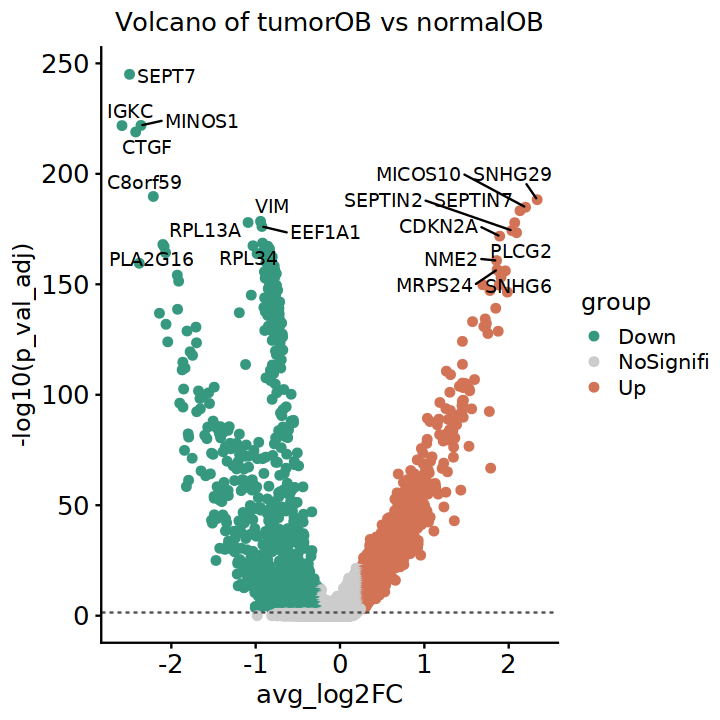

In [19]:

    ggplot(data=res,aes(x=avg_log2FC,y=-log10(p_val_adj)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    #geom_vline(xintercept = c(-.8,.8),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= avg_log2FC,y= -log10(p_val_adj),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","grey80","#D27356"))+
    theme_half_open() +
  theme(axis.title.x = element_text(size = 15))+
  theme(axis.text.x = element_text(size = 15))+
  theme(axis.text.y = element_text(size = 15))+
  theme(plot.title = element_text(size = 15,face = 4, hjust =0.5))+
  ggtitle("Volcano of tumorOB vs normalOB") 
    ggsave('Volcano.pdf',height = 8,width = 8)
    
   

In [20]:
dim(deg)

[1] 15700     6

In [21]:
diffgene = deg

In [22]:
library(clusterProfiler)
library(enrichplot)
library(org.Mm.eg.db)
#为每个基因添加对应的ENTREZID
diffgene$gene <- rownames(diffgene)
ids=bitr(diffgene$gene,'SYMBOL','ENTREZID','org.Hs.eg.db')
#合并数据，cluser3.markers中没有ENTREZID的基因将被过虑掉
diffgene=merge(diffgene,ids,by.x='gene',by.y='SYMBOL')

head(diffgene)

cluster3.markers = diffgene

#将基因按照avg_log2FC的大小进行降序排列
cluster3.markers <- cluster3.markers[order(cluster3.markers$avg_log2FC,decreasing = T),]
#生成仅含有ENTREZID名字和avg_log2FC值的gene list
cluster3.markers_list <- as.numeric(cluster3.markers$avg_log2FC)
names(cluster3.markers_list) <- cluster3.markers$ENTREZID
head(cluster3.markers_list)

#筛选差异较大的基因集
cluster3_de <- names(cluster3.markers_list)[abs(cluster3.markers_list) > 0.15]
head(cluster3_de)

length(cluster3_de)

Warning message:
"package 'enrichplot' was built under R version 4.2.2"

Attaching package: 'enrichplot'


The following object is masked from 'package:ggpubr':

    color_palette




'select()' returned 1:many mapping between keys and columns

Warning message in bitr(diffgene$gene, "SYMBOL", "ENTREZID", "org.Hs.eg.db"):
"13.02% of input gene IDs are fail to map..."


,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,group,ENTREZID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,A1BG,6.681121e-33,0.49436529,0.455,0.086,1.347449e-28,Up,1
2,A1BG-AS1,6.750985e-14,0.33350656,0.125,0.000,1.361539e-09,Up,503538
3,A2M,8.586783e-28,-0.95955602,0.359,0.514,1.731782e-23,Down,2
4,A2M-AS1,2.449355e-04,0.08718369,0.047,0.007,1.000000e+00,NoSignifi,144571
5,A4GALT,4.145180e-37,-0.67763125,0.001,0.120,8.359999e-33,Down,53947
6,AAAS,3.564214e-12,0.16341998,0.269,0.084,7.188306e-08,NoSignifi,8086


125144    440574       989      5336 100188893      4735 
 2.337643  2.199867  2.133799  2.093693  2.071370  2.037914

[1] "125144"    "440574"    "989"       "5336"      "100188893" "4735"

[1] 7128

In [23]:
cluster3_gsekg <- gseKEGG(cluster3.markers_list,organism = "hsa",pvalueCutoff = 0.05)
#将富集结果按照NES绝对值降序排列
cluster3_gsekg_arrange <- arrange(cluster3_gsekg,desc(abs(NES)))
head(cluster3_gsekg_arrange)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
hsa03010,hsa03010,Ribosome,127,-0.8059825,-3.270787,1.000000e-10,1.675000e-08,1.200000e-08,505,"tags=61%, list=4%, signal=60%",51065/6124/6150/6132/6223/3921/6170/6138/6234/6201/6191/6152/6202/6158/6141/6235/6125/6135/6142/11224/6193/6222/6134/6136/6210/6155/6227/6156/6122/6165/6130/9045/6229/6203/6176/6159/6188/6143/25873/6231/6137/7311/6187/6217/6207/6209/6189/6161/6175/6208/6171/6154/6133/6232/2197/6128/6233/6228/4736/6205/6194/9349/6167/6230/6157/6169/6146/6206/6181/6129/6164/6168/6147/6144/6204/23521/6160/6224
hsa05171,hsa05171,Coronavirus disease - COVID-19,175,-0.7370412,-3.159691,1.000000e-10,1.675000e-08,1.200000e-08,957,"tags=52%, list=7%, signal=49%",6773/185/6166/6173/6347/3553/2353/5602/6218/5595/51065/6124/6132/6223/3921/6170/6138/6234/6201/6191/6152/6202/6158/6141/6235/6125/6135/6142/716/11224/6193/6222/6134/6136/6210/6155/6227/6156/6122/6165/6130/9045/6229/6203/6176/6159/6188/6143/25873/6231/6137/7311/6187/6217/6207/715/6209/6189/6161/6175/6208/6171/6154/6133/6232/2197/6128/6233/6228/4736/6205/6194/9349/6167/6230/6157/6169/6146/6206/6181/6129/6164/6168/6147/3576/6144/6204/23521/6160/6224/1675
hsa05150,hsa05150,Staphylococcus aureus infection,37,-0.7514129,-2.450543,7.960597e-09,8.889333e-07,6.368477e-07,1115,"tags=35%, list=8%, signal=32%",3115/1669/3108/820/3123/3113/716/3122/715/3075/3689/1668/1675
hsa05144,hsa05144,Malaria,36,-0.7407254,-2.406616,4.847609e-08,3.247898e-06,2.326852e-06,1067,"tags=39%, list=8%, signal=36%",7040/7057/6347/3553/6382/975/4035/3576/3689/2995/7412/3039/3040/3043
hsa05332,hsa05332,Graft-versus-host disease,25,-0.7387028,-2.220988,6.824893e-06,1.834787e-04,1.314474e-04,2028,"tags=52%, list=15%, signal=44%",3002/3824/3115/3108/3553/3123/3113/3134/3106/3105/3107/3122/3133
hsa04940,hsa04940,Type I diabetes mellitus,28,-0.7123806,-2.206176,1.006985e-05,2.248932e-04,1.611175e-04,2028,"tags=46%, list=15%, signal=40%",3002/1363/3115/3108/3553/3123/3113/3134/3106/3105/3107/3122/3133


In [24]:
df = cluster3_gsekg_arrange@result

In [25]:
library(ggplot2)
library(ggstatsplot)

Warning message:
"package 'ggstatsplot' was built under R version 4.2.3"
You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167



In [26]:
options(repr.plot.width = 9)

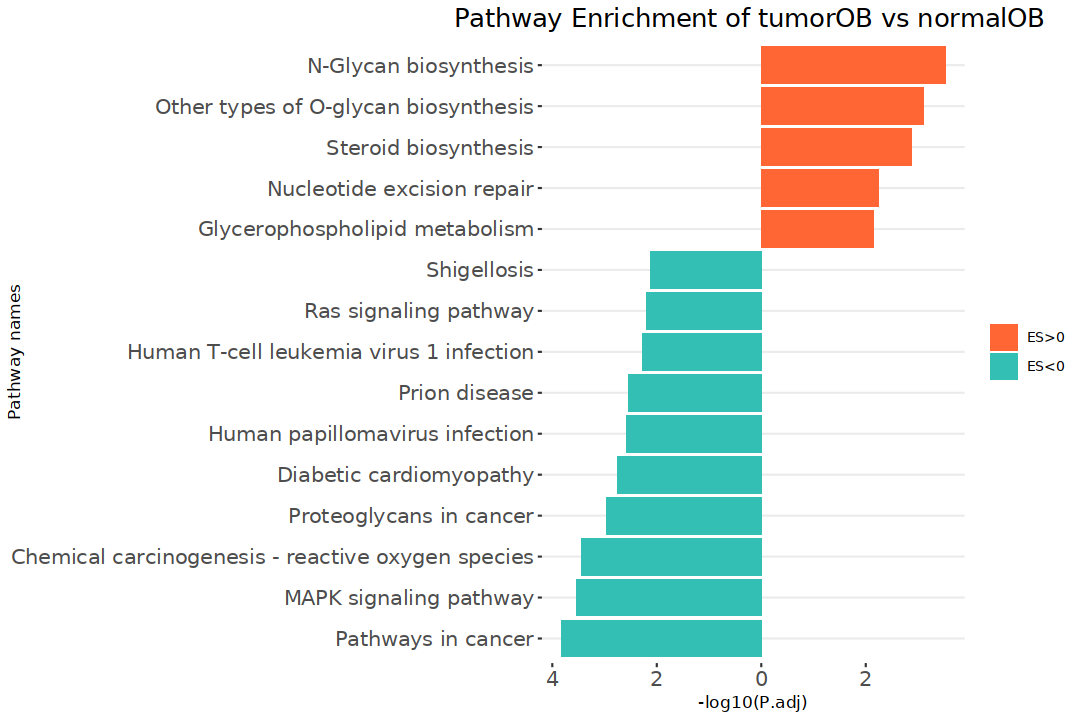

In [27]:
df = df[order(df$enrichmentScore),]
#设定分组：1--ES>0;   -1--ES<0
up = head(subset(df, enrichmentScore>0),10);up$group=1
down = tail(subset(df, enrichmentScore<0),10);down$group=-1
dat=rbind(up,down)
#dat$group = factor(dat$group);str(dat)
dat$pvalue = -log10(dat$pvalue)
dat$pvalue=dat$pvalue*dat$group 
dat=dat[order(dat$pvalue,decreasing = F),]
ggplot(dat, aes(x=reorder(Description,order(pvalue, decreasing = F)), y=pvalue, fill=group)) + 
  geom_bar(stat="identity", aes(fill=factor(group, levels = c(1,-1),  
                                            labels = c("ES>0","ES<0")))) + 
  xlab("Pathway names") +
  ylab("-log10(P.adj)") +
  coord_flip() + 
  theme_ggstatsplot() +
  scale_y_continuous(breaks=c(-4, -2, 0, 2, 4),
                     labels=c("4", "2", "0","2","4")) +
  scale_fill_manual(values = c("#ff6633","#34bfb5")) + 
  theme(plot.title = element_text(size = 15,hjust = 0.5),  
        axis.text = element_text(size = 12,face = 'bold'),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        legend.title = element_blank()) +
  ggtitle("Pathway Enrichment of tumorOB vs normalOB ") 